In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2023-07-20 04:50:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   195MB/s    in 0.3s    

2023-07-20 04:50:15 (195 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

local_zip= './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()

zip_ref.close()


In [3]:
#creating main directory and sub directory

import os

base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory
['train', 'vectorize.py', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [4]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.672.jpg', 'cat.910.jpg', 'cat.709.jpg', 'cat.540.jpg', 'cat.650.jpg', 'cat.675.jpg', 'cat.306.jpg', 'cat.390.jpg', 'cat.992.jpg', 'cat.394.jpg']
['dog.489.jpg', 'dog.578.jpg', 'dog.64.jpg', 'dog.726.jpg', 'dog.402.jpg', 'dog.795.jpg', 'dog.223.jpg', 'dog.885.jpg', 'dog.475.jpg', 'dog.785.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

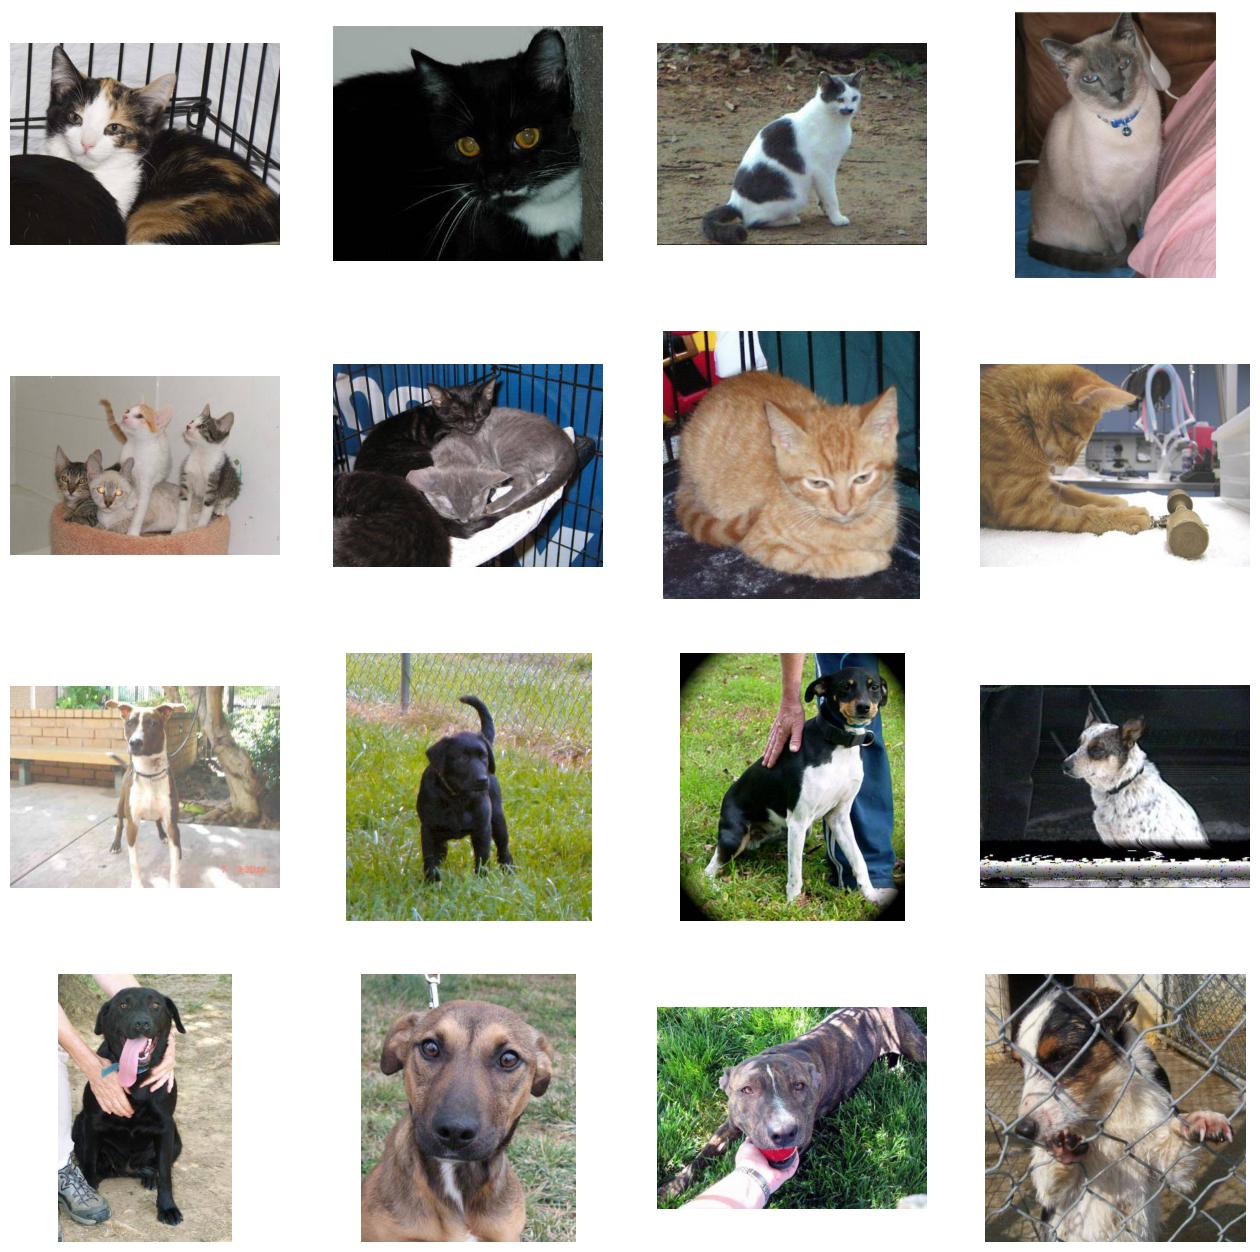

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')




test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data = validation_generator,
    verbose=2
)

Epoch 1/15
100/100 - 23s - loss: 0.7412 - accuracy: 0.6455 - val_loss: 0.5709 - val_accuracy: 0.6670 - 23s/epoch - 233ms/step
Epoch 2/15
100/100 - 24s - loss: 0.6227 - accuracy: 0.6750 - val_loss: 0.5486 - val_accuracy: 0.7320 - 24s/epoch - 237ms/step
Epoch 3/15
100/100 - 22s - loss: 0.6080 - accuracy: 0.6755 - val_loss: 0.5268 - val_accuracy: 0.7590 - 22s/epoch - 224ms/step
Epoch 4/15
100/100 - 23s - loss: 0.5813 - accuracy: 0.6990 - val_loss: 0.5589 - val_accuracy: 0.7150 - 23s/epoch - 226ms/step
Epoch 5/15
100/100 - 22s - loss: 0.5881 - accuracy: 0.7110 - val_loss: 0.6018 - val_accuracy: 0.7220 - 22s/epoch - 216ms/step
Epoch 6/15
100/100 - 23s - loss: 0.5674 - accuracy: 0.7170 - val_loss: 0.4962 - val_accuracy: 0.7600 - 23s/epoch - 226ms/step
Epoch 7/15
100/100 - 22s - loss: 0.5657 - accuracy: 0.7035 - val_loss: 0.5662 - val_accuracy: 0.7250 - 22s/epoch - 223ms/step
Epoch 8/15
100/100 - 22s - loss: 0.5635 - accuracy: 0.7185 - val_loss: 0.5073 - val_accuracy: 0.7630 - 22s/epoch - 225

In [14]:
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving download.jpeg to download.jpeg
1/1 [==============================] - 0s 317ms/step
[0.99999964]
download.jpeg is a dog
